In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("../data/TrainSet.txt", header=0, sep="\t")

In [3]:
n_with_reps = df["Compound Identifier"].drop_duplicates().count()
n_without_reps = df.drop("Replicate", axis=1)["Compound Identifier"].drop_duplicates().count()
print(f"Number of compounds in dataset (including replicates): {n_with_reps}")
print(f"Number of compounds in dataset (excluding replicates): {n_without_reps}")

Number of compounds in dataset (including replicates): 338
Number of compounds in dataset (excluding replicates): 338


In [4]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35084 entries, 0 to 35083
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Compound Identifier   35084 non-null  int64  
 1   Odor                  35084 non-null  object 
 2   Replicate             1960 non-null   object 
 3   Intensity             35084 non-null  object 
 4   Dilution              35084 non-null  object 
 5   subject #             35084 non-null  int64  
 6   INTENSITY/STRENGTH    35084 non-null  int64  
 7   VALENCE/PLEASANTNESS  25980 non-null  float64
 8   BAKERY                25980 non-null  float64
 9   SWEET                 25980 non-null  float64
 10  FRUIT                 25980 non-null  float64
 11  FISH                  25980 non-null  float64
 12  GARLIC                25980 non-null  float64
 13  SPICES                25980 non-null  float64
 14  COLD                  25980 non-null  float64
 15  SOUR               

,Compound Identifier,subject #,INTENSITY/STRENGTH,VALENCE/PLEASANTNESS,BAKERY,SWEET,FRUIT,FISH,GARLIC,SPICES,...,ACID,WARM,MUSKY,SWEATY,AMMONIA/URINOUS,DECAYED,WOOD,GRASS,FLOWER,CHEMICAL
count,3.508400e+04,35084.000000,35084.000000,25980.000000,25980.000000,25980.000000,25980.000000,25980.000000,25980.000000,25980.000000,...,25980.000000,25980.000000,25980.000000,25980.000000,25980.000000,25980.000000,25980.000000,25980.000000,25980.000000,25980.000000
mean,3.498355e+05,25.000000,39.890890,44.376135,3.416590,12.925212,4.953426,1.712240,3.387452,6.052002,...,5.886798,5.772132,8.407275,4.137837,5.118129,4.778907,3.468129,3.428329,6.057236,15.615012
std,1.214971e+06,14.142337,37.002882,27.754299,14.041675,25.041555,16.943679,9.629778,13.755972,17.293312,...,16.266140,16.829423,20.589364,14.822344,16.899752,16.507106,13.807406,14.127427,18.806966,27.592485
min,1.260000e+02,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.341000e+03,13.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.125700e+04,25.000000,36.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.132500e+04,37.000000,75.000000,63.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000
max,6.999977e+06,49.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [6]:
df = df[df.Replicate.isna()].drop("Replicate", axis=1)

AttributeError: 'DataFrame' object has no attribute 'Replicate'

In [7]:
df.groupby(by="Intensity").size()
df_low = df[df["Intensity"] == "low "]
df_high = df[df["Intensity"] == "high "]

In [8]:
df_high.head()

,Compound Identifier,Odor,Intensity,Dilution,subject #,INTENSITY/STRENGTH,VALENCE/PLEASANTNESS,BAKERY,SWEET,FRUIT,...,ACID,WARM,MUSKY,SWEATY,AMMONIA/URINOUS,DECAYED,WOOD,GRASS,FLOWER,CHEMICAL
1,126,4-Hydroxybenzaldehyde,high,01.Oct,1,37,60.0,0.0,72.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,126,4-Hydroxybenzaldehyde,high,01.Oct,2,64,71.0,0.0,9.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
5,126,4-Hydroxybenzaldehyde,high,01.Oct,3,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,126,4-Hydroxybenzaldehyde,high,01.Oct,4,100,90.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92.0,0.0
9,126,4-Hydroxybenzaldehyde,high,01.Oct,5,58,58.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


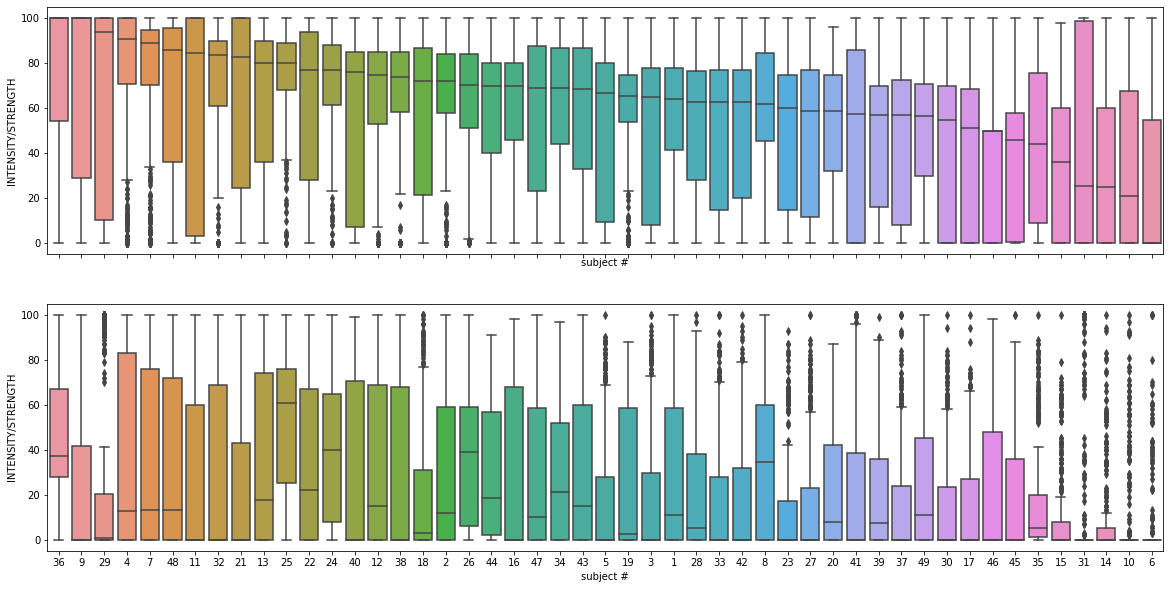

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10), sharex=True, sharey=False)

target_col = "INTENSITY/STRENGTH"
# target_col = "VALENCE/PLEASANTNESS"
subject_order = df_high.groupby("subject #").median().sort_values(by=target_col, ascending=False).index
sns.boxplot(
    data = df_high, 
    order=subject_order,
    x = "subject #", 
    y = target_col,
    ax=ax1
)

sns.boxplot(
    data = df_low, 
    order = subject_order,
    x = "subject #", 
    y = target_col,
    ax = ax2
)

plt.show()

In [10]:
df_high_wide = (df_high.loc[:,["subject #", "Compound Identifier", target_col]]
                .pivot(index="subject #", columns="Compound Identifier", values=target_col))
df_low_wide = (df_low.loc[:,["subject #", "Compound Identifier", target_col]]
                .pivot(index="subject #", columns="Compound Identifier", values=target_col))
df_diff_wide = df_low_wide - df_high_wide
print(df_diff_wide.shape)
df_diff_wide.head(n=10)
# df_low_wide.head(n=10)

(49, 338)


Compound Identifier,126,176,177,196,239,240,241,244,261,263,...,5363388,5363491,5364729,5365027,5365049,5366244,5367706,5368076,6429333,6999977
subject #,,,,,,,,,,,,,,,,,,,,,
1,-30,0,3,-41,21,-73,79,-5,-11,-15,...,-53,-47,-20,11,-59,0,52,-60,0,5
2,-9,-83,-23,0,0,-30,0,-9,-25,-54,...,-43,0,2,-20,-84,0,0,-72,0,-59
3,89,-69,-83,-40,-64,-51,64,-54,-33,11,...,-66,0,-60,0,-17,-62,-2,0,71,0
4,-71,20,-90,-91,-69,-4,0,-5,-93,-56,...,-12,21,0,0,-65,-13,-69,-10,-1,-100
5,-58,-67,-60,0,0,-84,-18,7,-7,0,...,-68,0,-50,-63,-68,-54,0,-69,0,0
6,0,0,0,0,0,-88,0,0,-17,0,...,-53,0,4,0,0,-57,9,0,0,13
7,-12,0,-17,-21,-22,-85,-2,-28,-11,3,...,-3,14,-10,-2,-94,-90,-79,-31,-66,-5
8,-5,-57,-33,-45,-4,-57,19,-79,-56,0,...,-40,0,17,-82,-50,-66,-54,-50,0,-32
9,-100,-17,-100,0,-31,-100,0,-47,-100,-25,...,-100,0,-61,-62,-30,-43,0,0,0,-54


In [18]:
from sklearn.preprocessing import StandardScaler, scale
from sklearn.decomposition import PCA

import umap

In [20]:
df_low_wide_scaled = df_low_wide.apply(scale, axis=0)
df_high_wide_scaled = df_high_wide.apply(scale, axis=0)
df_diff_wide_scaled = df_diff_wide.apply(scale, axis=0)


df_low_wide_scaled.describe()

Compound Identifier,126,176,177,196,239,240,241,244,261,263,...,5363388,5363491,5364729,5365027,5365049,5366244,5367706,5368076,6429333,6999977
count,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,...,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01
mean,-1.302813e-17,2.492337e-17,4.984675e-17,-1.586033e-17,4.446557e-17,-1.812609e-17,9.063045e-18,-1.268826e-16,-9.063045e-17,-7.930164e-18,...,6.344132e-17,-3.172066e-17,-1.081901e-16,-1.019593e-17,9.063045e-18,1.586033e-17,-1.087565e-16,6.797284e-17,-3.681862e-17,-2.718914e-17
std,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,...,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00
min,-8.957639e-01,-4.004062e-01,-5.802930e-01,-5.131677e-01,-8.058542e-01,-6.379282e-01,-4.156710e-01,-1.410572e+00,-1.319961e+00,-4.120736e-01,...,-9.802436e-01,-5.418381e-01,-1.551294e+00,-1.303788e+00,-4.980787e-01,-3.764504e-01,-5.056996e-01,-5.792515e-01,-3.724343e-01,-5.999372e-01
25%,-8.957639e-01,-4.004062e-01,-5.802930e-01,-5.131677e-01,-8.058542e-01,-6.379282e-01,-4.156710e-01,-1.023454e+00,-1.257830e+00,-4.120736e-01,...,-9.802436e-01,-5.418381e-01,-6.411557e-01,-1.164604e+00,-4.980787e-01,-3.764504e-01,-5.056996e-01,-5.792515e-01,-3.724343e-01,-5.999372e-01
50%,-2.780724e-01,-4.004062e-01,-5.802930e-01,-5.131677e-01,-8.058542e-01,-6.379282e-01,-4.156710e-01,1.378970e-01,3.265032e-01,-4.120736e-01,...,-4.306093e-01,-5.418381e-01,6.672972e-02,3.942609e-01,-4.980787e-01,-3.764504e-01,-5.056996e-01,-5.792515e-01,-3.724343e-01,-5.999372e-01
75%,7.029670e-01,-4.004062e-01,1.759399e-01,2.329812e-01,6.791866e-01,2.965244e-02,-3.135764e-01,7.713615e-01,8.856796e-01,-3.035166e-01,...,9.129415e-01,7.560531e-02,7.071975e-01,8.118139e-01,-2.322197e-01,-3.764504e-01,-2.230462e-01,3.616321e-01,-3.724343e-01,1.400311e-01
max,2.338033e+00,4.174638e+00,3.604196e+00,4.635259e+00,2.278461e+00,2.935592e+00,4.280682e+00,1.791943e+00,1.444856e+00,4.255878e+00,...,2.073281e+00,3.780266e+00,1.819589e+00,1.479899e+00,3.755665e+00,4.702056e+00,2.697705e+00,3.706996e+00,3.783816e+00,2.595381e+00


In [12]:
pca_high, pca_low, pca_diff = PCA(), PCA(), PCA()

pca_high = pca_high.fit(df_high_wide_scaled)
pcs_high = pca_high.fit_transform(df_high_wide_scaled)
pcs_high = pd.DataFrame(pcs_high, index=df_high_wide_scaled.index, columns=[f"PC{i+1}" for i in range(pcs_high.shape[1])])
# print(pca_high.explained_variance_ratio_)
# pcs_high.head()

pca_low = pca_low.fit(df_low_wide_scaled)
pcs_low = pca_low.fit_transform(df_low_wide_scaled)
pcs_low = pd.DataFrame(pcs_low, index=df_low_wide_scaled.index, columns=[f"PC{i+1}" for i in range(pcs_low.shape[1])])

pca_diff = pca_diff.fit(df_diff_wide_scaled)
pcs_diff = pca_diff.fit_transform(df_diff_wide_scaled)
pcs_diff = pd.DataFrame(pcs_diff, index=df_diff_wide_scaled.index, columns=[f"PC{i+1}" for i in range(pcs_diff.shape[1])])

print(pca_low.explained_variance_ratio_)
pcs_low.head()

[1.55829064e-01 4.46115077e-02 4.33312814e-02 3.97013002e-02
 3.66300145e-02 3.47694229e-02 3.32846540e-02 3.05018914e-02
 3.00540294e-02 2.94398697e-02 2.71195556e-02 2.67024297e-02
 2.51408912e-02 2.41190462e-02 2.23620245e-02 2.19664765e-02
 2.10829786e-02 2.06217701e-02 1.99417053e-02 1.94517396e-02
 1.85643923e-02 1.72296192e-02 1.70696150e-02 1.61788709e-02
 1.57436505e-02 1.49348387e-02 1.41582105e-02 1.38628932e-02
 1.37148606e-02 1.28399651e-02 1.22436362e-02 1.15680600e-02
 1.09148606e-02 1.01653099e-02 9.74839552e-03 9.50330366e-03
 9.11978201e-03 8.74767630e-03 8.25144612e-03 7.78356540e-03
 6.77463887e-03 6.44778529e-03 6.08423983e-03 5.65043537e-03
 5.40182993e-03 4.23225707e-03 3.55126022e-03 2.85294885e-03
 3.07318642e-32]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49
subject #,,,,,,,,,,,,,,,,,,,,,
1,3.007270,-1.143490,-7.301539,5.949204,3.434693,-6.977745,-0.359748,0.546957,3.314739,4.620117,...,1.926744,-0.852963,-0.301807,0.303480,0.773072,0.253249,-0.427657,-0.299355,0.181914,3.222944e-15
2,2.360046,1.344884,-6.169729,1.895504,-0.963433,-3.227852,-0.099885,0.463814,-0.474775,0.520043,...,1.831579,0.613192,-0.720594,-0.168674,-1.439976,1.301194,0.354726,1.003440,0.345004,3.222944e-15
3,-3.314203,-6.210655,-4.025003,7.049193,-3.151765,-5.617394,-6.044023,1.536750,5.084756,-0.366788,...,-2.010951,-0.317329,0.265478,-0.869977,-0.143890,0.506236,0.169794,0.456958,0.053465,3.222944e-15
4,10.063321,6.365770,-6.717393,12.852158,-4.056962,12.588643,5.020412,3.844580,4.780674,-1.567441,...,-0.628329,-0.065534,0.779676,-0.118210,0.011067,0.079794,0.513326,-0.264146,-0.099161,3.222944e-15
5,-5.133358,0.548514,-1.257611,0.813238,-0.696533,-0.419600,0.092008,1.337038,-0.783854,2.906862,...,-2.695750,0.642340,-1.067633,1.263645,0.240192,-0.586469,-0.531540,-0.545747,-0.326037,3.222944e-15


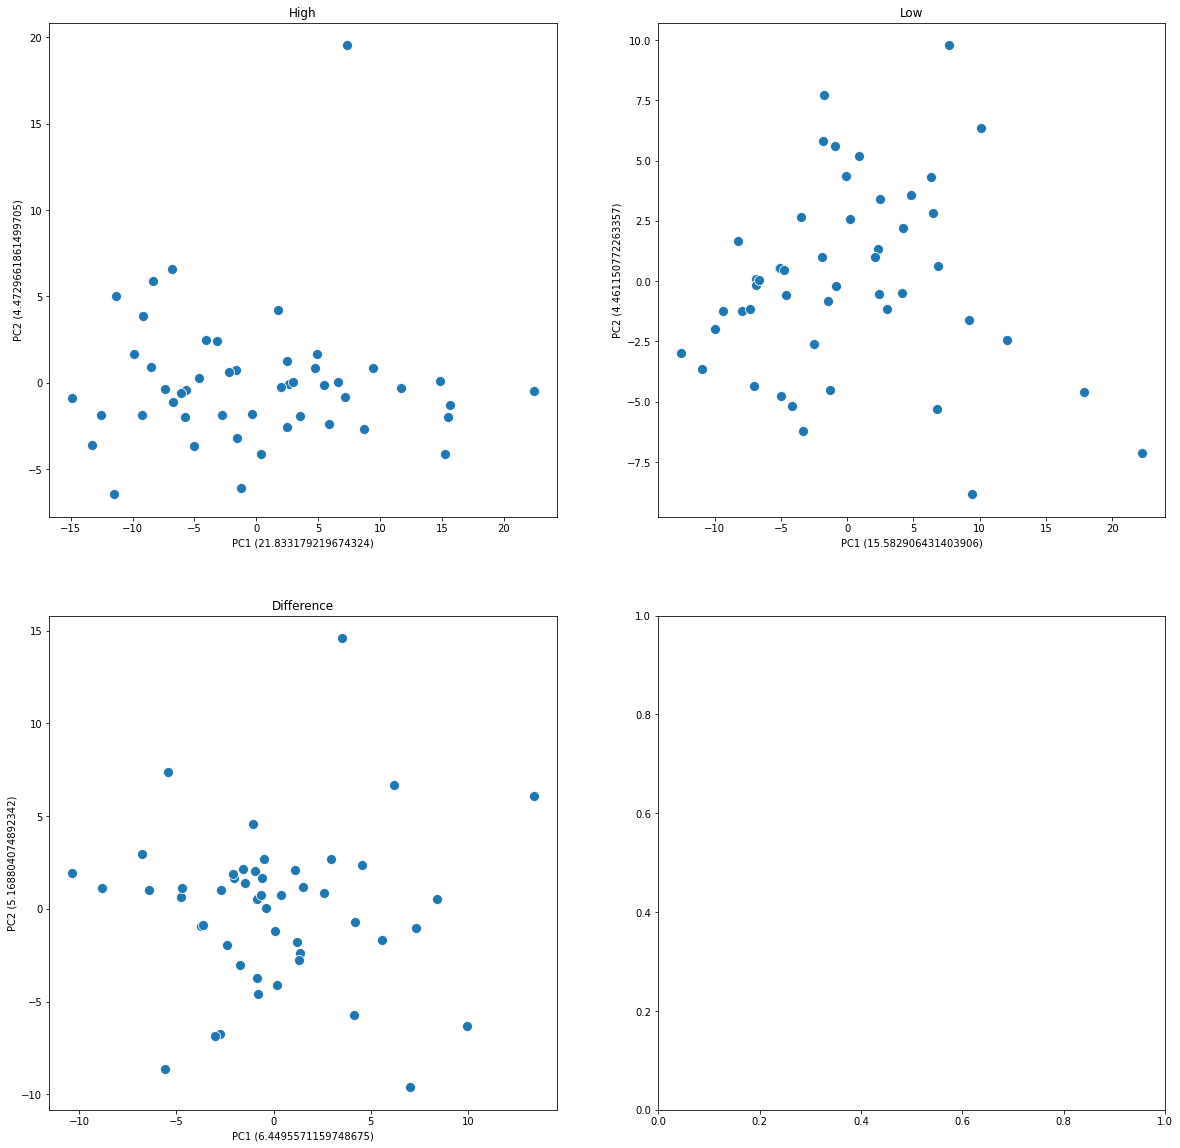

In [18]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,20))

# outlier in PC2 is subject number 31
sns.scatterplot(
    data=pcs_high, 
    x="PC1", y="PC2", 
#     hue=clustering_low.labels_, 
    palette="colorblind", s=100, ax=axs[0][0]
)
axs[0][0].set_title("High")
axs[0][0].set_xlabel(f"PC1 ({pca_high.explained_variance_ratio_[0] * 100})")
axs[0][0].set_ylabel(f"PC2 ({pca_high.explained_variance_ratio_[1] * 100})")

sns.scatterplot(
    data=pcs_low, 
    x="PC1", y="PC2", 
#     hue=clustering_low.labels_, 
    palette="colorblind", s=100, ax=axs[0][1]
)
axs[0][1].set_title("Low")
axs[0][1].set_xlabel(f"PC1 ({pca_low.explained_variance_ratio_[0] * 100})")
axs[0][1].set_ylabel(f"PC2 ({pca_low.explained_variance_ratio_[1] * 100})")

sns.scatterplot(
    data=pcs_diff, 
    x="PC1", y="PC2", 
#     hue=clustering_diff.labels_, 
    palette="colorblind", s=100, ax=axs[1][0]
)
axs[1][0].set_title("Difference")
axs[1][0].set_xlabel(f"PC1 ({pca_diff.explained_variance_ratio_[0] * 100})")
axs[1][0].set_ylabel(f"PC2 ({pca_diff.explained_variance_ratio_[1] * 100})")

plt.show()

In [16]:
from sklearn.cluster import DBSCAN

clustering_high = DBSCAN(eps=2, min_samples=3).fit(pcs_high.loc[:,"PC1":"PC2"])
print(clustering_high.labels_)

clustering_low = DBSCAN(eps=2, min_samples=3).fit(pcs_low.loc[:,"PC1":"PC2"])
print(clustering_low.labels_)

clustering_diff = DBSCAN(eps=2, min_samples=3).fit(pcs_diff.loc[:,"PC1":"PC2"])
print(clustering_diff.labels_)

[-1  0  5 -1  1 -1 -1 -1 -1  2 -1  0  0  2  2  3 -1  4  3  1 -1  0  5 -1
 -1  0  5 -1 -1  5 -1  0 -1  0 -1 -1  5  0  5  4 -1  1  4  3 -1 -1  4  0
  1]
[ 0  0  5 -1  1  1  2 -1  3  1  3 -1 -1  1  1  2 -1 -1  3  4  4  2  1 -1
 -1 -1  1 -1  3  1 -1  3  1  0  5 -1  1 -1 -1  3  1  1  2  0  1  5  0 -1
  4]
[-1 -1  0 -1  0 -1 -1 -1  1 -1 -1  0  0 -1  0  0  0  0  0  0 -1  0  0  0
 -1  0  0  0 -1  0 -1  1  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0  0
  0]


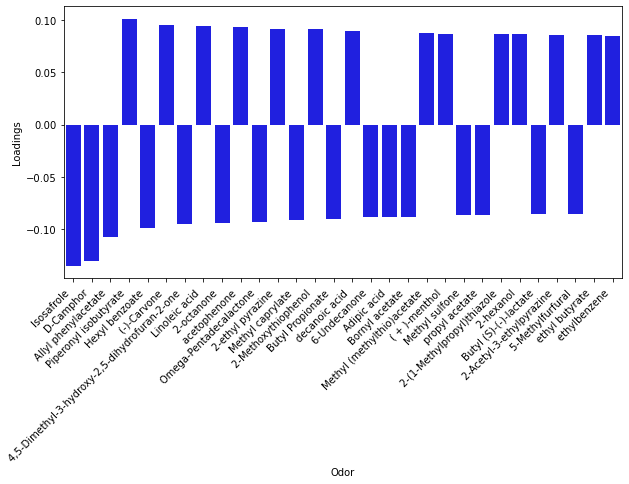

In [15]:
pca_high_loadings = pd.DataFrame(pca_high.components_.T[:,0:2], index=df_high_wide.columns)
df_id_odor_map = df[["Compound Identifier", "Odor"]].set_index("Compound Identifier").drop_duplicates()

fig = plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data = pca_high_loadings.sort_values(by=1, ascending=False, key=abs).merge(
        df_id_odor_map,
        left_index=True,
        right_index=True
    ).head(n=30),
    x="Odor",
    y=1,
    color="blue"
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_ylabel("Loadings")
plt.show()